In [1]:
import numpy as np
import xgboost as xgb
from wideboost.wrappers import wxgb

import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

(ds_train, ds_test), ds_info = tfds.load(
    'fashion_mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

for i in ds_train.batch(60000):
    a = i
    
for i in ds_test.batch(60000):
    b = i

In [2]:
xtrain = a[0].numpy().reshape([-1,28*28])
ytrain = a[1].numpy()

xtest = b[0].numpy().reshape([-1,28*28])
ytest = b[1].numpy()

dtrain = xgb.DMatrix(xtrain,label=ytrain)
dtest = xgb.DMatrix(xtest,label=ytest)

In [3]:
param = {'max_depth':2, 'eta':0.1, 'objective':'multi:softmax','eval_metric':['merror'], 'num_class':10 }
num_round = 100
watchlist = [(dtrain,'train'),(dtest,'test')]
xgb_results = dict()
bst = xgb.train(param, dtrain, num_round,watchlist,evals_result=xgb_results)

[0]	train-merror:0.32323	test-merror:0.33590
[1]	train-merror:0.29428	test-merror:0.30190
[2]	train-merror:0.28510	test-merror:0.29390
[3]	train-merror:0.27502	test-merror:0.28880
[4]	train-merror:0.26643	test-merror:0.27880
[5]	train-merror:0.26292	test-merror:0.27600
[6]	train-merror:0.25790	test-merror:0.27050
[7]	train-merror:0.25023	test-merror:0.26300
[8]	train-merror:0.24520	test-merror:0.25680
[9]	train-merror:0.24225	test-merror:0.25330
[10]	train-merror:0.23783	test-merror:0.24820
[11]	train-merror:0.23648	test-merror:0.24580
[12]	train-merror:0.23100	test-merror:0.24200
[13]	train-merror:0.22758	test-merror:0.23970
[14]	train-merror:0.22597	test-merror:0.23660
[15]	train-merror:0.22222	test-merror:0.23290
[16]	train-merror:0.21962	test-merror:0.23050
[17]	train-merror:0.21760	test-merror:0.22860
[18]	train-merror:0.21545	test-merror:0.22660
[19]	train-merror:0.21298	test-merror:0.22550
[20]	train-merror:0.21152	test-merror:0.22400
[21]	train-merror:0.20942	test-merror:0.2226

In [4]:
# wideboost uses the hessian for multi:softmax rather than 2 times the hessian as used in xgboost.
# On Fashion MNIST at least, the hessian tends to perform better. This can partially be chalked up
# a larger effective learning rate (i.e. a better comparison is xgb with eta = 0.2).
param['extra_dims'] = 0
wxgb_results = dict()
wbst = wxgb.train(param, dtrain, num_round,watchlist,evals_result=wxgb_results)

Overwriting param `num_class`
Overwriting param `objective` while setting `obj` in train.
Taking first argument of evals. Multiple evals not supported using xgboost backend.
Moving param `eval_metric` to an feval.
Setting param `disable_default_eval_metric` to 1.
[0]	train-merror:0.32323	test-merror:0.33590
[1]	train-merror:0.28490	test-merror:0.29500
[2]	train-merror:0.27015	test-merror:0.27990
[3]	train-merror:0.25373	test-merror:0.26470
[4]	train-merror:0.24900	test-merror:0.25650
[5]	train-merror:0.24010	test-merror:0.25050
[6]	train-merror:0.23125	test-merror:0.24370
[7]	train-merror:0.22640	test-merror:0.23670
[8]	train-merror:0.22237	test-merror:0.23230
[9]	train-merror:0.21737	test-merror:0.22820
[10]	train-merror:0.21365	test-merror:0.22400
[11]	train-merror:0.20992	test-merror:0.22120
[12]	train-merror:0.20630	test-merror:0.21710
[13]	train-merror:0.20417	test-merror:0.21470
[14]	train-merror:0.20218	test-merror:0.21240
[15]	train-merror:0.19958	test-merror:0.21100
[16]	train

In [5]:
param['extra_dims'] = 32
wxgb32_results = dict()
wbst = wxgb.train(param, dtrain, num_round,watchlist,evals_result=wxgb32_results)

Overwriting param `num_class`
Overwriting param `objective` while setting `obj` in train.
Taking first argument of evals. Multiple evals not supported using xgboost backend.
Moving param `eval_metric` to an feval.
Setting param `disable_default_eval_metric` to 1.
[0]	train-merror:0.25688	test-merror:0.26750
[1]	train-merror:0.21973	test-merror:0.23200
[2]	train-merror:0.19985	test-merror:0.21290
[3]	train-merror:0.18762	test-merror:0.19920
[4]	train-merror:0.17720	test-merror:0.18830
[5]	train-merror:0.16792	test-merror:0.17780
[6]	train-merror:0.16018	test-merror:0.16980
[7]	train-merror:0.15413	test-merror:0.16510
[8]	train-merror:0.14868	test-merror:0.15870
[9]	train-merror:0.14452	test-merror:0.15780
[10]	train-merror:0.14113	test-merror:0.15360
[11]	train-merror:0.13845	test-merror:0.15210
[12]	train-merror:0.13472	test-merror:0.14900
[13]	train-merror:0.13223	test-merror:0.14840
[14]	train-merror:0.12997	test-merror:0.14470
[15]	train-merror:0.12755	test-merror:0.14350
[16]	train

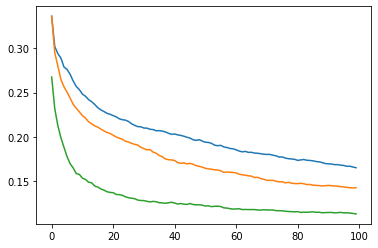

In [10]:
plt.plot(xgb_results['test']['merror'])
plt.plot(wxgb_results['test']['merror'])
plt.plot(wxgb32_results['test']['merror'])
plt.show()